In [100]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
df = pd.read_csv("haha.csv")
df = df.drop(columns=['ADV','NOUN','VERB','word_freq_rate_Nsw','Noun_rate','F_K_R','PRON', 'NOUN_Ratio' , 'PRP_Ratio' , 'TTR' ],axis=1)
dt.head()


,PRP_NOUN_Ratio,word_freq_rate,verb_freq_rate,PRON_rate,ADV_rate,H_S,BM,SICH,A_R_I
0,28.764045,4.235493,1.270648,4.320203,0.677679,28.961185,14.263374,12.992832,10
1,39.957717,1.456855,0.747105,5.117669,0.000000,25.454191,15.407202,14.448052,9
2,34.718499,4.569055,1.064382,5.399792,0.337487,22.607381,15.921747,17.662683,9
3,31.208499,3.817799,0.763560,5.660874,0.342285,28.946711,14.788018,14.009112,8
4,18.297332,5.404671,1.059207,2.878870,0.000000,30.511771,13.786073,14.001986,10


In [101]:
h = df.values.tolist()

In [102]:
h[0]

[1980717.0,
 1980.0,
 28.76404494,
 4.235493435,
 1.27064803,
 4.320203304,
 0.67767895,
 28.96118495,
 14.26337419,
 12.99283154,
 10.0]

In [103]:
dt = pd.read_csv("haha.csv")
dt = dt.drop(columns=['Dates','Year','ADV','NOUN','VERB','word_freq_rate_Nsw','Noun_rate','F_K_R','PRON', 'NOUN_Ratio' , 'PRP_Ratio' , 'TTR' ],axis=1)
dt.head()

,PRP_NOUN_Ratio,word_freq_rate,verb_freq_rate,PRON_rate,ADV_rate,H_S,BM,SICH,A_R_I
0,28.764045,4.235493,1.270648,4.320203,0.677679,28.961185,14.263374,12.992832,10
1,39.957717,1.456855,0.747105,5.117669,0.000000,25.454191,15.407202,14.448052,9
2,34.718499,4.569055,1.064382,5.399792,0.337487,22.607381,15.921747,17.662683,9
3,31.208499,3.817799,0.763560,5.660874,0.342285,28.946711,14.788018,14.009112,8
4,18.297332,5.404671,1.059207,2.878870,0.000000,30.511771,13.786073,14.001986,10


In [104]:
f = dt.values.tolist()

In [105]:
f[2]

[34.71849866,
 4.569055036,
 1.0643821390000001,
 5.399792316,
 0.33748702,
 22.60738136,
 15.92174741,
 17.6626826,
 9.0]

In [113]:
from sklearn.svm import OneClassSVM
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

one_svm = OneClassSVM(nu=0.1, kernel='rbf', random_state=2018)

one_svm.fit(f)
pre_test_outliers = one_svm.predict(f)

total_test_data = np.hstack((f, pre_test_outliers.reshape(-1,1)))


normal_test_data = total_test_data[total_test_data[:, -1] == 1]

outlier_test_data = total_test_data[total_test_data[:, -1] == -1]

print('Anomaly detection is：{}/{}'.format(len(outlier_test_data), len(total_test_data)))

py.iplot([go.Scatter3d(x=total_test_data[:,3], y=total_test_data[:,4], z =total_test_data[:,5], 
                       mode='markers',marker=dict(color=total_test_data[:, -1], size=5))])



Anomaly detection is：40/98


In [107]:
print(outlier_test_data)

[[34.57446809  0.          0.          1.55189137  0.         34.37119391
  14.52416433 11.18012422  8.         -1.        ]
 [31.          5.37463595  0.76780514  4.42149854  0.34418851 29.17572873
  14.73148228 12.35827664  8.         -1.        ]
 [32.6055313   6.22065728  0.55751174  5.60446009  0.41079812 23.82065117
  16.27103239 14.93902439  9.         -1.        ]
 [30.26052104  4.47466982  1.43899073  4.92805046  0.27597083 26.27658826
  15.04675979 14.21709894 11.         -1.        ]
 [48.13664596  2.00739567  0.63391442  5.01848917  0.         31.52659024
  15.06902283 12.98174442  7.         -1.        ]
 [28.07646356  6.21428571  1.66666667  4.28571429  0.         23.52898938
  15.4014776  15.17960603  9.         -1.        ]
 [34.75274725  2.66356349  1.21541246  5.35298681  0.31031808 30.64809152
  14.46638543 12.8342246  12.         -1.        ]
 [20.76628352  2.8893828   2.25679603  3.89810224  0.53000513 30.04544163
  13.85019726 12.02303816 11.         -1.        ]


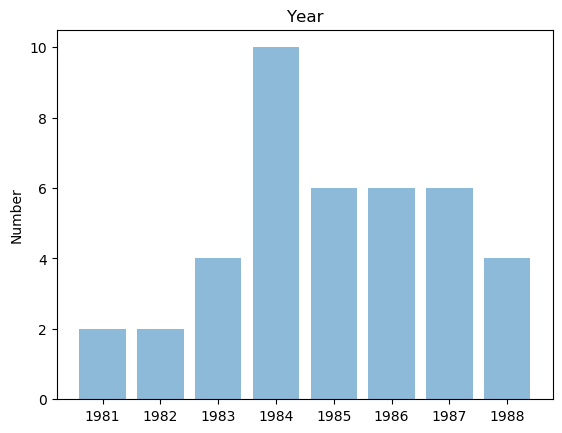

In [112]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('1981', '1982','1983','1984','1985','1986','1987','1988')
y_pos = np.arange(len(objects))
performance = [2,2,4,10,6,6,6,4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Year')

plt.show()